# Illustrating the remapping procedure

We also generate a plot of $a_i$ vs. $a_f$...

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl

mpl.rcParams.update({'font.size': 18,'font.family':'serif'})

mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
#mpl.rcParams['xtick.direction'] = 'in'
#mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rc('text', usetex=True)

mpl.rcParams['legend.edgecolor'] = 'inherit'

import Remapping as RM
#reload(RM)

### Plot the remapping of the semi-major axis

   Tabulating binding energy and truncation radius (M_PBH = 1000)...
   Tabulating binding energy and truncation radius (M_PBH = 30)...
   Tabulating binding energy and truncation radius (M_PBH = 1)...


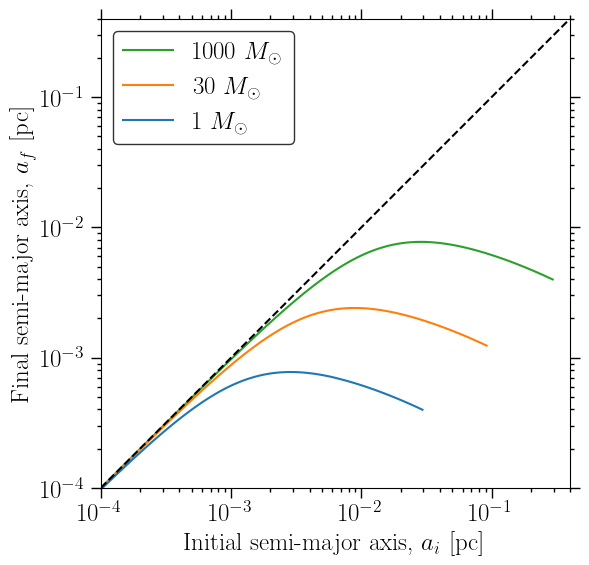

In [3]:
M_list = [1000, 30, 1]

pl.figure(figsize=(7,6))

cols = ['C2', 'C1', 'C0']

for M_PBH, col in zip(M_list, cols):
    amax = RM.semimajoraxis_full(RM.z_eq, 1.0, M_PBH)
    #print amax
    a_i = np.logspace(-4, np.log10(amax), 100)
    a_f = np.vectorize(RM.calc_af)(a_i, M_PBH)
    pl.loglog(a_i, a_f, label=str(M_PBH) + " $M_\odot$", color=col)
    
pl.legend()
pl.loglog([1e-4, 4e-1], [1e-4, 4e-1], linestyle='--', color='k')

pl.xlabel(r"Initial semi-major axis, $a_i\,\,[\mathrm{pc}]$")
pl.ylabel(r"Final semi-major axis, $a_f \,\,[\mathrm{pc}]$")

pl.xlim(1e-4, 4e-1)
pl.ylim(1e-4, 4e-1)

pl.gca().set_aspect('equal')

pl.tight_layout()
pl.savefig("../plots/Mapping_a.pdf", bbox_inches='tight')
pl.show()
    